In [1]:
import pandas as pd

# Veri setini yükleyelim
file_path = 'veri-seti.txt'
columns = [
    'Number of times pregnant',
    'Plasma glucose concentration',
    'Diastolic blood pressure',
    'Triceps skinfold thickness',
    '2-Hour serum insulin',
    'Body mass index',
    'Diabetes pedigree function',
    'Age',
    'Class variable'
]
data = pd.read_csv(file_path, header=None, names=columns)

# İlk beş satırı gösterelim
data.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6\t148\t72\t35\t0\t33.6\t0.627\t50\t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1\t85\t66\t29\t0\t26.6\t0.351\t31\t0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8\t183\t64\t0\t0\t23.3\t0.672\t32\t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1\t89\t66\t23\t94\t28.1\t0.167\t21\t0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0\t137\t40\t35\t168\t43.1\t2.288\t33\t1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Veri setini doğru ayırıcı ile yeniden yükleyelim
data = pd.read_csv(file_path, delimiter="\t", names=columns)

# İlk beş satırı ve bazı temel istatistikleri gösterelim
data.head(), data.describe()


(   Number of times pregnant  Plasma glucose concentration  \
 0                         6                           148   
 1                         1                            85   
 2                         8                           183   
 3                         1                            89   
 4                         0                           137   
 
    Diastolic blood pressure  Triceps skinfold thickness  2-Hour serum insulin  \
 0                        72                          35                     0   
 1                        66                          29                     0   
 2                        64                           0                     0   
 3                        66                          23                    94   
 4                        40                          35                   168   
 
    Body mass index  Diabetes pedigree function  Age  Class variable  
 0             33.6                       0.627   50         

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import numpy as np

# Sıfır değerlerini uygun özelliklerin medyanları ile değiştirme
columns_with_zeros = ['Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skinfold thickness',
                      '2-Hour serum insulin', 'Body mass index']
for column in columns_with_zeros:
    data[column].replace(0, data[column].median(), inplace=True)

# Veri setini %70 eğitim ve %30 test olarak ayırma
X = data.drop('Class variable', axis=1)
y = data['Class variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modelini eğitme
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = nb_model.predict(X_test)

# Performans metriklerini hesaplama ve raporlama
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print("Konfüzyon Matrisi:")
print(conf_matrix)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.3f}".format(f1))
print("\nSınıflandırma Raporu:")
print(report)


Konfüzyon Matrisi:
[[118  33]
 [ 29  51]]

Accuracy: 73.16%
F1 Score: 0.622

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       151
           1       0.61      0.64      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



<Figure size 800x600 with 0 Axes>

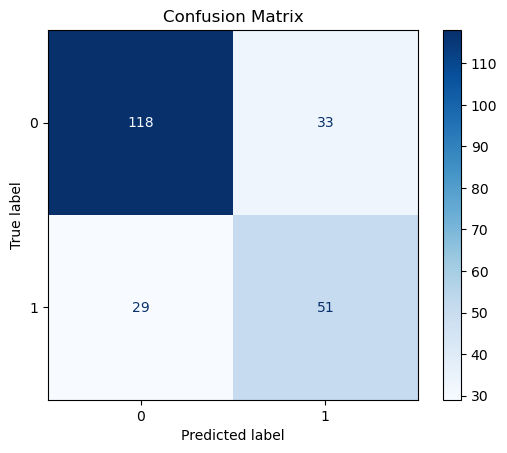

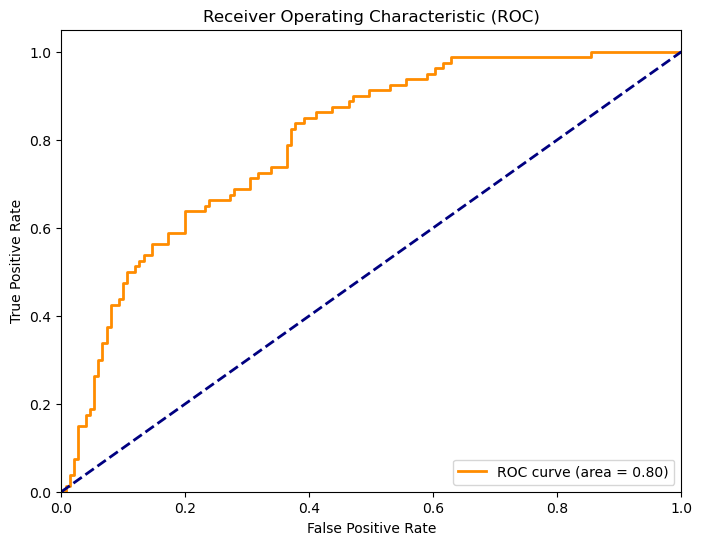

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# Modeliniz
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Confusion Matrix Display
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Eğrisi
y_scores = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

# KNN için en iyi k değerini belirlemek
best_k = 1
best_score = 0
k_values = range(1, 26)  # 1'den 25'e kadar k değerlerini deneyeceğiz

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    score = knn_model.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

# En iyi k değeri ile KNN modeli
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Performans metrikleri
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)  # Ortalama karesel hata
report_knn = classification_report(y_test, y_pred_knn)

best_k, best_score, conf_matrix_knn, accuracy_knn, f1_knn, mse_knn, report_knn

print("En İyi k Değeri:", best_k)
print("En İyi Skor (Accuracy): {:.2f}%".format(best_score * 100))
print("\nKonfüzyon Matrisi:")
print(conf_matrix_knn)
print("\nAccuracy: {:.2f}%".format(accuracy_knn * 100))
print("F1 Skoru: {:.3f}".format(f1_knn))
print("Ortalama Kareler Hatası (MSE): {:.3f}".format(mse_knn))
print("\nSınıflandırma Raporu:")
print(report_knn)



En İyi k Değeri: 11
En İyi Skor (Accuracy): 72.73%

Konfüzyon Matrisi:
[[120  31]
 [ 32  48]]

Accuracy: 72.73%
F1 Skoru: 0.604
Ortalama Kareler Hatası (MSE): 0.273

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.60      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



<Figure size 800x600 with 0 Axes>

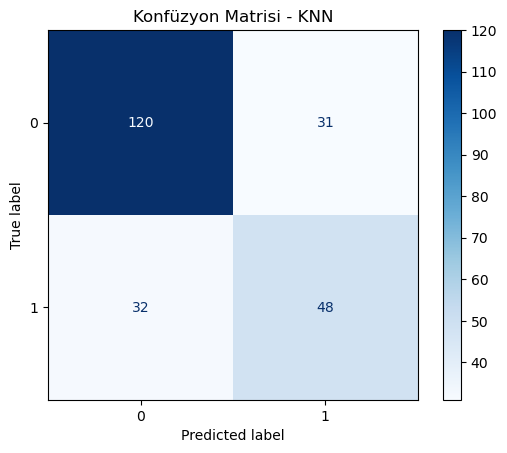

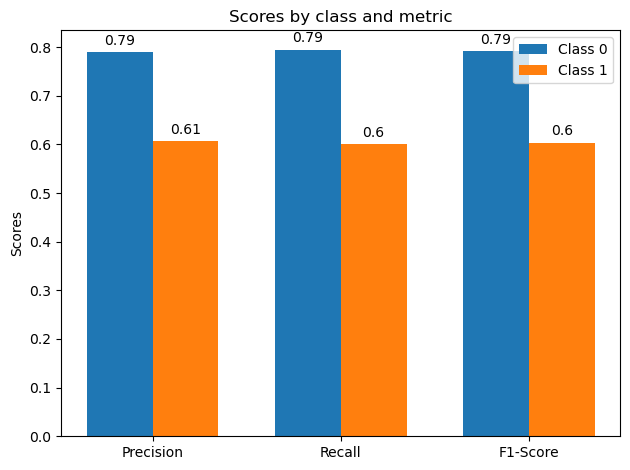

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
import seaborn as sns

# Konfüzyon Matrisi Görselleştirme
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')
plt.title('Konfüzyon Matrisi - KNN')
plt.show()

# Sınıflandırma Raporunu Görselleştirmek
metrics = precision_recall_fscore_support(y_test, y_pred_knn, average=None, labels=[0, 1])
precision = metrics[0]
recall = metrics[1]
f1 = metrics[2]

# Bar Grafiği İçin Verileri Hazırlama
labels = ['Precision', 'Recall', 'F1-Score']
neg_class = [precision[0], recall[0], f1[0]]
pos_class = [precision[1], recall[1], f1[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, neg_class, width, label='Class 0')
rects2 = ax.bar(x + width/2, pos_class, width, label='Class 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Fonksiyonu tanımlayarak bar grafiklerindeki değerleri göster
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


MLP Sınıflandırıcısı Raporu:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       151
           1       0.62      0.47      0.54        80

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

SVM Sınıflandırıcısı Raporu:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



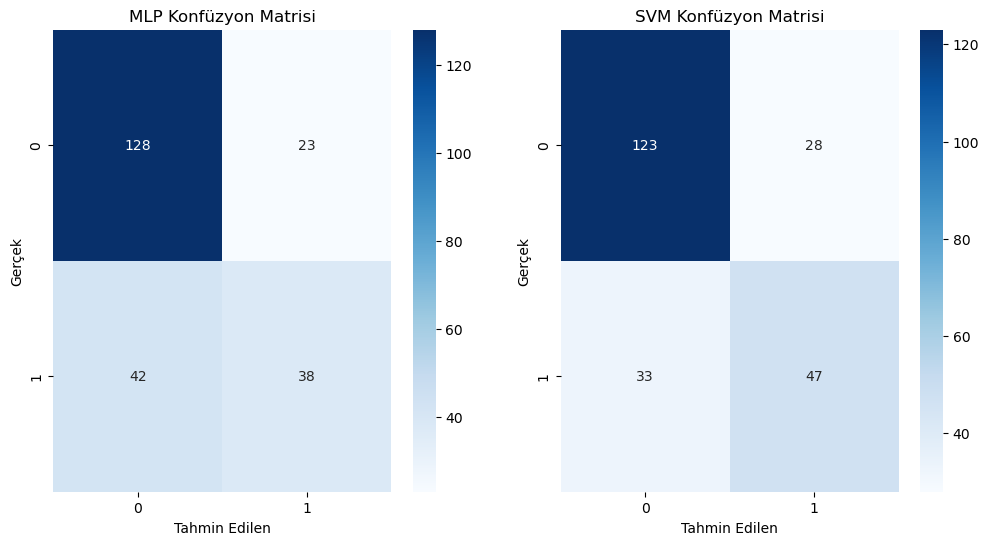

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Veri setini ayırmak için kullanılan kod
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MLP Sınıflandırıcısını uygulama
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# SVM Sınıflandırıcısını uygulama
svm = SVC(kernel='linear')  # Kernel tipi olarak linear, poly, rbf denenebilir
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Sonuçları raporlama
print("MLP Sınıflandırıcısı Raporu:")
print(classification_report(y_test, y_pred_mlp))
print("SVM Sınıflandırıcısı Raporu:")
print(classification_report(y_test, y_pred_svm))

# Konfüzyon matrislerini çizdirme
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(confusion_matrix_mlp, annot=True, fmt="d", ax=ax[0], cmap='Blues')
ax[0].set_title('MLP Konfüzyon Matrisi')
ax[0].set_xlabel('Tahmin Edilen')
ax[0].set_ylabel('Gerçek')

sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", ax=ax[1], cmap='Blues')
ax[1].set_title('SVM Konfüzyon Matrisi')
ax[1].set_xlabel('Tahmin Edilen')
ax[1].set_ylabel('Gerçek')

plt.show()
